# 1.1 PIL： Python图像处理类库
PIL（Python Imaging Library Python，图像处理类库）提供了通用的图像处理功能，以及大量有用的基本图像操作，比如图像缩放、裁剪、旋转、颜色转换等。 PIL 是免费的，可以从 http://www.pythonware.com/products/pil/ 下载。

利用 PIL 中的函数，我们可以从大多数图像格式的文件中读取数据，然后写入最常见的图像格式文件中。 PIL 中最重要的模块为 Image。

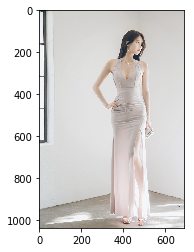

In [8]:
from PIL import Image
from pylab import *
pil_im = Image.open("../image/062.jpg")
imshow(pil_im)

图像的颜色转换可以使用 convert() 方法来实现。要读取一幅图像，并将其转换成灰度图像，只需要加上 convert('L')，

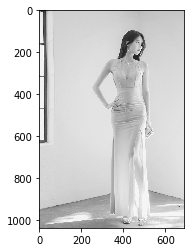

In [10]:
pil_imL = Image.open("../image/062.jpg").convert('L')
imshow(pil_imL)

上述代码的返回值 pil_im 是一个 PIL 图像对象。

## 1.1.1　转换图像格式
通过 save() 方法， PIL 可以将图像保存成多种格式的文件。

In [3]:
pil_imL.save("../data/L.jpg")

PIL 的 open() 函数用于创建 PIL 图像对象， save() 方法用于保存图像到具有指定文件名的文件。

PIL 函数会进行简单的检查，如果文件不是 JPEG 格式，会自动将其转换成 JPEG 格式；如果转换失败，它会在控制台输出一条报告失败的消息。

## 1.1.2　创建缩略图 
使用 PIL 可以很方便地创建图像的缩略图。 thumbnail() 方法接受一个元组参数（该参数指定生成缩略图的大小），然后将图像转换成符合元组参数指定大小的缩略图。

In [12]:
pil_im.thumbnail((128,128))

## 1.1.3　复制和粘贴图像区域
使用 crop() 方法可以从一幅图像中裁剪指定区域：该区域使用四元组来指定。四元组的坐标依次是（左，上，右，下）。 PIL 中指定坐标系的左上角坐标为（0， 0）。我们可以旋转上面代码中获取的区域，然后使用paste() 方法将该区域放回去，

In [5]:
# 复制
box = (100, 100, 400, 400)
region = pil_im.crop(box)
# 粘贴
region_1 = region.transpose(Image.ROTATE_180)
pil_im.paste(region_1, box)

1.1.4　调整尺寸和旋转
调用 resize() 方法。该方法的参数是一个元组，用来指定新图像的大小.

可以使用逆时针方式表示旋转角度，然后调用 rotate() 方法.

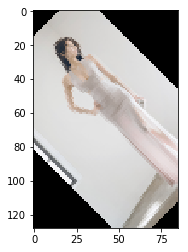

In [13]:
out = pil_im.resize((128,128))
out_1 = pil_im.rotate(45)
imshow(out_1)

# 1.2 Matplotlib
我们处理数学运算、绘制图表，或者在图像上绘制点、直线和曲线时， Matplotlib是个很好的类库，具有比 PIL 更强大的绘图功能。 Matplotlib 可以绘制出高质量的图表，就像本书中的许多插图一样。 Matplotlib 中的 PyLab 接口包含很多方便用户创建图像的函数。 Matplotlib 是开源工具，可以从 http://matplotlib.sourceforge.net/ 免费下载。该链接中包含非常详尽的使用说明和教程。

## 1.2.1　绘制图像、 点和线
尽管 Matplotlib 可以绘制出较好的条形图、饼状图、散点图等，但是对于大多数计算机视觉应用来说，仅仅需要用到几个绘图命令。最重要的是，我们想用点和线来表示一些事物，比如兴趣点、对应点以及检测出的物体。

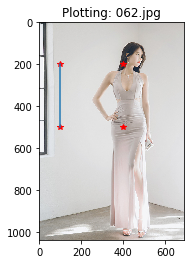

In [16]:
# 读取图像
im = array(Image.open("../image/062.jpg"))
# 绘制图像
imshow(im)
# 定义点
x = [100, 100, 400, 400]
y = [200, 500, 200, 500]
# 使用红色新标绘制点
plot(x, y, 'r*')
# 绘制连接线
plot(x[:2], y[:2])
# 添加标题，绘制图像
title('Plotting: 062.jpg')
show()

首先绘制出原始图像，然后在 x 和 y 列表中给定点的 x 坐标和 y 坐标上绘制出红色星状标记点，最后在两个列表表示的前两个点之间绘制一条线段（默认为蓝色）。该例子的绘制结果如图 1-2 所示。 show() 命令首先打开图形用户界面（GUI），然后新建一个图像窗口。该图形用户界面会循环阻断脚本，然后暂停，直到最后一个图像窗口关闭。在每个脚本里，你只能调用一次 show() 命令，而且通常是在脚本的结尾调用。

在绘图时，有很多选项可以控制图像的颜色和样式。最有用的一些短命令如表 1-1、表 1-2 和表 1-3 所示。使用方法见下面的例子：

plot(x,y) # 默认为蓝色实线

plot(x,y,'r*') # 红色星状标记

plot(x,y,'go-') # 带有圆圈标记的绿线

plot(x,y,'ks:') # 带有正方形标记的黑色虚线

表1-1：用PyLab库绘图的基本颜色格式命令：
颜色

'b' 蓝色

'g' 绿色

'r' 红色

'c' 青色

'm' 品红

'y' 黄色

'k' 黑色

'w' 白色6 

表1-2：用PyLab库绘图的基本线型格式命令

线型

'-' 实线

'--' 虚线

':' 点线

表1-3：用PyLab库绘图的基本绘制标记格式命令

标记

'.' 点

'o' 圆圈

's' 正方形

'*' 星形

'+' 加号

'x' 叉号

1.2.2　图像轮廓和直方图

(0.5, 689.5, 0.5, 1035.5)

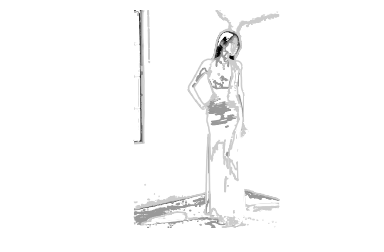

In [18]:
# 读取图像
im2 = array(Image.open("../image/062.jpg").convert('L'))
# 新建图像
figure()
# 不使用颜色信息
gray()
# 在原点左上角显示轮廓图像
contour(im2, origin='image')
axis('equal')
axis('off')

图像的直方图用来表征该图像像素值的分布情况。用一定数目的小区间（bin）来指定表征像素值的范围，每个小区间会得到落入该小区间表示范围的像素数目。

该（灰度）图像的直方图可以使用 hist() 函数绘制.

hist() 函数的第二个参数指定小区间的数目。需要注意的是，因为 hist() 只接受一维数组作为输入，所以我们在绘制图像直方图之前，必须先对图像进行压平处理。

flatten() 方法将任意数组按照行优先准则转换成一维数组。

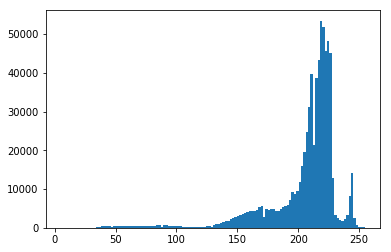

In [19]:
figure()
hist(im2.flatten(), 128)
show()

1.2.3　交互式标注
有时用户需要和某些应用交互，例如在一幅图像中标记一些点，或者标注一些训练数据。 PyLab 库中的 ginput() 函数就可以实现交互式标注。

plase click 3 points


F:\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


you click: []


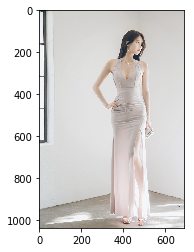

In [20]:
# 读取图像
im3 = array(Image.open("../image/062.jpg"))
imshow(im)
print('plase click 3 points')
x= ginput(3)
print('you click:',x)
show()

1.3 NumPy
NumPy（http://www.scipy.org/NumPy/）是非常有名的 Python 科学计算工具包，其中包含了大量有用的思想，比如数组对象（用来表示向量、矩阵、图像等）以及线性代数函数。 NumPy 中的数组对象几乎贯穿用于本书的所有例子中 1 数组对象可以帮助你实现数组中重要的操作，比如矩阵乘积、转置、解方程系统、向量乘积和归一化，这为图像变形、对变化进行建模、图像分类、图像聚类等提供了基础。NumPy 可以从 http://www.scipy.org/Download 免费下载.

1.3.1　图像数组表示
NumPy 中的数组对象是多维的，可以用来表示向量、矩阵和图像。一个数组对象很像一个列表（或者是列表的列表），但是数组中所有的元素必须具有相同的数据类型。

In [27]:
im4 = array(Image.open("../image/062.jpg"))
print(im4.shape)
im4.dtype

(1036, 690, 3)


dtype('uint8')

In [28]:
im5 = array(Image.open("../image/062.jpg").convert('L'))
print(im5.shape)
im5.dtype

(1036, 690)


dtype('uint8')

1.3.2　灰度变换
将图像读入 NumPy 数组对象后，我们可以对它们执行任意数学操作。一个简单的例子就是图像的灰度变换。

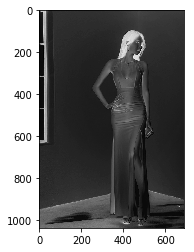

In [36]:
im6 = array(Image.open("../image/062.jpg").convert('L'))
im6_1 = 255 - im6
imshow(im6_1)

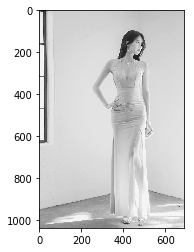

In [34]:
im6_2 = (100.0/255) * im6 + 100
imshow(im6_2)

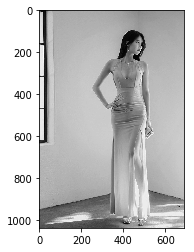

In [37]:
im6_3 = 255.0 * (im6/255.0)**2
imshow(im6_3)

array() 变换的相反操作可以使用 PIL 的 fromarray() 函数完成 . pil_im = Image.fromarray(im)

1.3.3　图像缩放
NumPy 的数组对象是我们处理图像和数据的主要工具。想要对图像进行缩放处理没有现成简单的方法。

使用 resize() 函数，进行重新定义大小

1.3.4　直方图均衡化
图像灰度变换中一个非常有用的例子就是直方图均衡化。直方图均衡化是指将一幅图像的灰度直方图变平，使变换后的图像中每个灰度值的分布概率都相同。直方图均衡化通常是对图像灰度值进行归一化的一个非常好的方法，并且可以增强图像的对比度

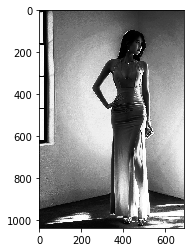

In [43]:
im7 = array(Image.open("../image/062.jpg").convert('L'))
imhist, bins = histogram(im7.flatten(), 256, normed=True)
cdf = imhist.cumsum()
cdf = 255 * cdf / cdf[-1]
im7_1 = interp(im7.flatten(), bins[:-1], cdf)
im7_2 = im7_1.reshape(im7.shape)
imshow(im7_2)

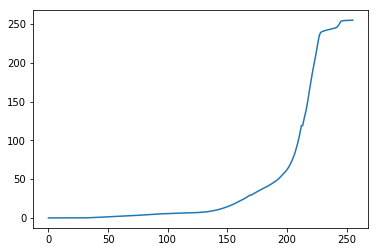

In [46]:
figure()
plot(cdf)
show()

1.3.5　图像平均
图像平均操作是减少图像噪声的一种简单方式，通常用于艺术特效。我们可以简单地从图像列表中计算出一幅平均图像。假设所有的图像具有相同的大小，我们可以将这些图像简单地相加，然后除以图像的数目，来计算平均图像。